In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('monthly-beer-production-in-austr.csv')

In [3]:
df.head()

,Month,Monthly beer production in Australia
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
Month                                   476 non-null object
Monthly beer production in Australia    476 non-null float64
dtypes: float64(1), object(1)
memory usage: 7.5+ KB


In [5]:
from pandas.tseries.offsets import MonthEnd

In [6]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')+MonthEnd(1)

In [7]:
df.head()

,Month,Monthly beer production in Australia
0,1956-01-31,93.2
1,1956-02-29,96.0
2,1956-03-31,95.2
3,1956-04-30,77.1
4,1956-05-31,70.9


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
Month                                   476 non-null datetime64[ns]
Monthly beer production in Australia    476 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.5 KB


In [9]:
df.set_index('Month', inplace=True)

In [10]:
df.head()

,Monthly beer production in Australia
Month,
1956-01-31,93.2
1956-02-29,96.0
1956-03-31,95.2
1956-04-30,77.1
1956-05-31,70.9


C:\Users\SujitSonar\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


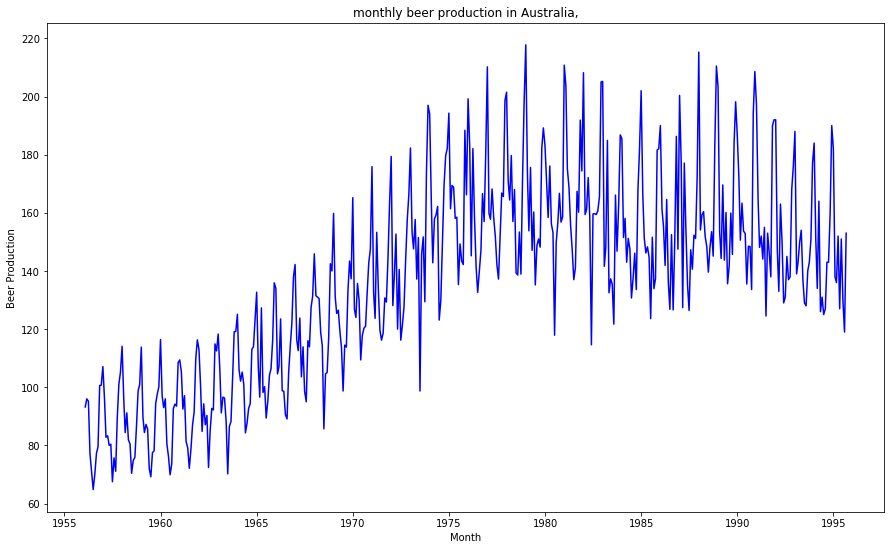

In [11]:
plt.figure(figsize=(15,9))
plt.plot(df,color='blue')
plt.title('monthly beer production in Australia,')
plt.xlabel('Month')
plt.ylabel('Beer Production')
plt.show()

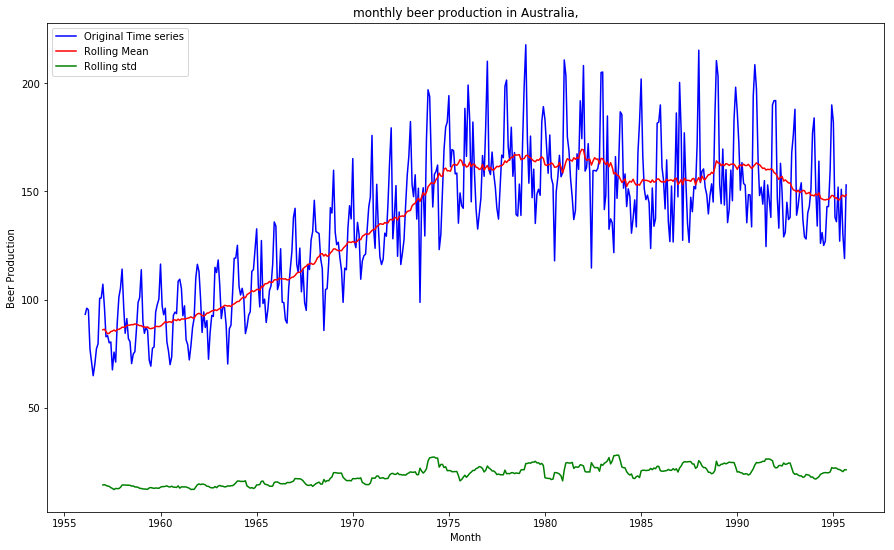

In [12]:
ts_rolling_mean = df['Monthly beer production in Australia'].rolling(12).mean()
ts_rolling_std = df['Monthly beer production in Australia'].rolling(12).std()

plt.figure(figsize=(15,9))
plt.plot(df,color='blue', label = 'Original Time series')
plt.plot(ts_rolling_mean,color='Red',label = 'Rolling Mean')
plt.plot(ts_rolling_std,color='green',label = 'Rolling std')
plt.title('monthly beer production in Australia,')
plt.xlabel('Month')
plt.ylabel('Beer Production')
plt.legend(loc='best')
plt.show()

In [13]:
# Null Hypothesis = Non stationary

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
adf_test = adfuller(df['Monthly beer production in Australia'])
adf_test

(-2.282661418787579,
 0.17762099829132444,
 17,
 458,
 {'1%': -3.4447087976702284,
  '5%': -2.867871300049488,
  '10%': -2.5701423432047443},
 3463.9034375936567)

In [16]:
print(f'test statistics {adf_test[0]}')
print(f'P-value {adf_test[1]}')
print(f'Lags Used {adf_test[2]}')
print(f'No of observations {adf_test[3]}')

test statistics -2.282661418787579
P-value 0.17762099829132444
Lags Used 17
No of observations 458


In [17]:
#p value is > 0.05, hence we accept the null hypothesis and say that the time series is Non Stationary

In [18]:
# Applying diferencing to make the time series stationary

In [19]:
nshifts = 1
ts_beer = df['Monthly beer production in Australia'] - df['Monthly beer production in Australia'].shift(nshifts)
adfuller(ts_beer[nshifts:])[1]

2.4234117859955237e-05

In [20]:
nshifts = 2
ts_beer = df['Monthly beer production in Australia'] - df['Monthly beer production in Australia'].shift(nshifts)
adfuller(ts_beer[nshifts:])[1]

0.0011648119802492132

In [21]:
adfuller(ts_beer[nshifts:])

(-4.051222497916452,
 0.0011648119802492132,
 18,
 455,
 {'1%': -3.4448040131772584,
  '5%': -2.8679131843980197,
  '10%': -2.5701646673107112},
 3459.904231694939)

In [22]:
ts_beer[0:5]

Month
1956-01-31     NaN
1956-02-29     NaN
1956-03-31     2.0
1956-04-30   -18.9
1956-05-31   -24.3
Name: Monthly beer production in Australia, dtype: float64

In [23]:
# so while apply the 2nd degree diferencing, we get that p value = 0.0011 which is < 0.005,
# hence w ecan reject the null hypothesis and say tht the diference tie series isn now stationary

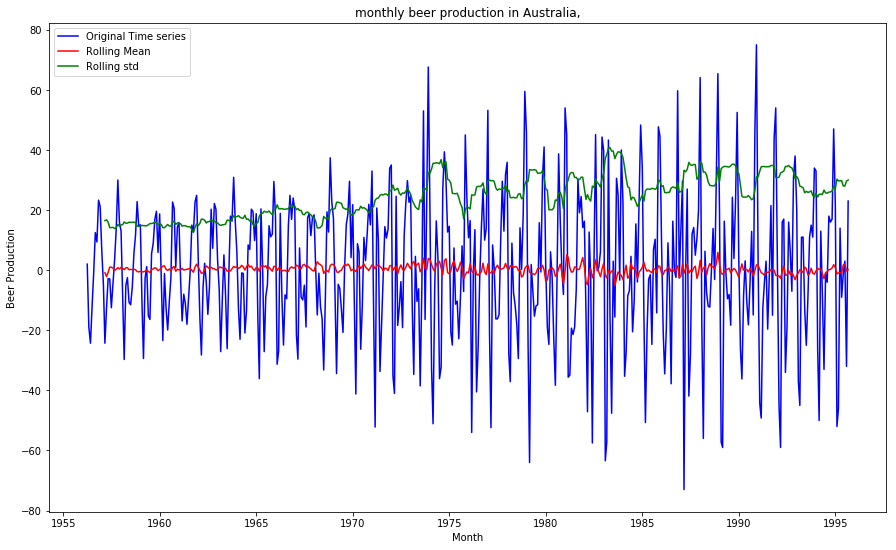

In [24]:
ts_beer_rolling_mean = ts_beer.rolling(12).mean()
ts_beer_rolling_std = ts_beer.rolling(12).std()

plt.figure(figsize=(15,9))
plt.plot(ts_beer,color='blue', label = 'Original Time series')
plt.plot(ts_beer_rolling_mean,color='Red',label = 'Rolling Mean')
plt.plot(ts_beer_rolling_std,color='green',label = 'Rolling std')
plt.title('monthly beer production in Australia,')
plt.xlabel('Month')
plt.ylabel('Beer Production')
plt.legend(loc='best')
plt.show()

#  Perform ARIMA modeling in Python after obtaining ACF and PACF plots.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [26]:
df_beer = pd.read_csv('monthly-beer-production-in-austr.csv')

In [27]:
df_beer.head()

,Month,Monthly beer production in Australia
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [28]:
df_beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
Month                                   476 non-null object
Monthly beer production in Australia    476 non-null float64
dtypes: float64(1), object(1)
memory usage: 7.5+ KB


In [29]:
# converting the time object to datetime format

In [30]:
from pandas.tseries.offsets import MonthEnd

In [31]:
df_beer['Month'] = pd.to_datetime(df_beer['Month'])+MonthEnd(1)
df_beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
Month                                   476 non-null datetime64[ns]
Monthly beer production in Australia    476 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.5 KB


In [32]:
df_beer.set_index('Month', inplace=True)
df_beer.head()

,Monthly beer production in Australia
Month,
1956-01-31,93.2
1956-02-29,96.0
1956-03-31,95.2
1956-04-30,77.1
1956-05-31,70.9


In [33]:
# Plotting to the time series

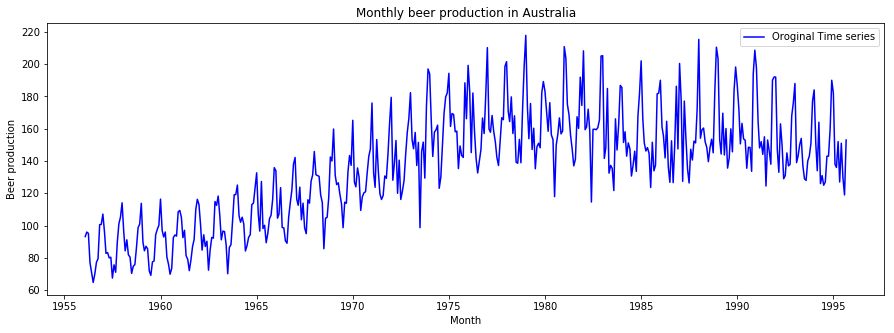

In [34]:
plt.figure(figsize=(15,5))
plt.plot(df_beer['Monthly beer production in Australia'], color= 'blue', label = 'Oroginal Time series')
plt.title('Monthly beer production in Australia')
plt.xlabel('Month')
plt.ylabel('Beer production')
plt.legend(loc='best')
plt.show()

In [35]:
# Checking Non Stationarity using plots

In [36]:
df_beer_mean = df_beer['Monthly beer production in Australia'].rolling(12).mean()
df_beer_std = df_beer['Monthly beer production in Australia'].rolling(12).std()

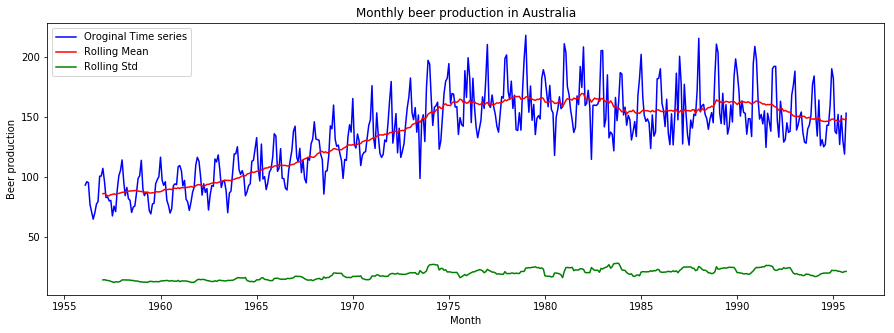

In [37]:
plt.figure(figsize=(15,5))
plt.plot(df_beer['Monthly beer production in Australia'], color= 'blue', label = 'Oroginal Time series')
plt.plot(df_beer_mean, color= 'red', label = 'Rolling Mean')
plt.plot(df_beer_std, color= 'green', label = 'Rolling Std')
plt.title('Monthly beer production in Australia')
plt.xlabel('Month')
plt.ylabel('Beer production')
plt.legend(loc='best')
plt.show()

In [38]:
# we see that the rolling mean is in upward trend and the rolling std is slightly increasing,
# therefore wecan say that the time series is Non - Stationary

In [39]:
# Applying Dicky Fuller Statistical test to confirm the non stationarity

In [40]:
# Null hypo thesis  = Time series in Non Stationary

In [41]:
from statsmodels.tsa.stattools import adfuller

In [42]:
adf_test = adfuller(df_beer['Monthly beer production in Australia'])
adf_test

(-2.282661418787579,
 0.17762099829132444,
 17,
 458,
 {'1%': -3.4447087976702284,
  '5%': -2.867871300049488,
  '10%': -2.5701423432047443},
 3463.9034375936567)

In [43]:
print(f'test statistics {adf_test[0]}')
print(f'P value {adf_test[1]}')
print(f'Lags Used {adf_test[2]}')
print(f'No of Observations {adf_test[3]}')

test statistics -2.282661418787579
P value 0.17762099829132444
Lags Used 17
No of Observations 458


In [44]:
# here p value = 0.177 > 0.005, hence we accept the Null Hypothesis
# the Time series data is Non Stationary

In [45]:
# Removing Non stationarity from the time series by applying nshifts

In [46]:
nshifts = 1
ts_beer = df_beer['Monthly beer production in Australia'] - df_beer['Monthly beer production in Australia'].shift(nshifts)
ts_beer[0:5]

Month
1956-01-31     NaN
1956-02-29     2.8
1956-03-31    -0.8
1956-04-30   -18.1
1956-05-31    -6.2
Name: Monthly beer production in Australia, dtype: float64

In [47]:
adfuller(ts_beer.dropna(axis=0))

(-4.9806637430648415,
 2.4234117859955237e-05,
 18,
 456,
 {'1%': -3.4447721346720885,
  '5%': -2.8678991615065095,
  '10%': -2.570157193174823},
 3455.355385768023)

In [48]:
# here p value = 2.42 * 10^-5 = 0.000024, which is < 0.05,
# henec i can reject the null hypothesis now and say that my time series is now stationary
# d = 1

In [49]:
# Plotting the time series after making the time series stationary

In [50]:
ts_beer_mean = ts_beer.rolling(12).mean()
ts_beer_std = ts_beer.rolling(12).std()

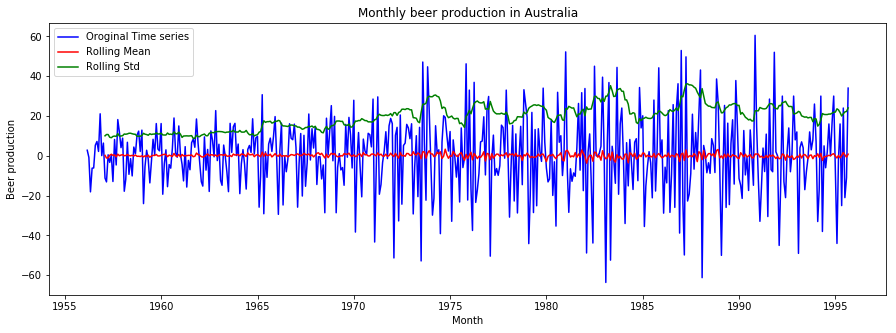

In [51]:
plt.figure(figsize=(15,5))
plt.plot(ts_beer, color= 'blue', label = 'Oroginal Time series')
plt.plot(ts_beer_mean, color= 'red', label = 'Rolling Mean')
plt.plot(ts_beer_std, color= 'green', label = 'Rolling Std')
plt.title('Monthly beer production in Australia')
plt.xlabel('Month')
plt.ylabel('Beer production')
plt.legend(loc='best')
plt.show()

In [52]:
# Plotting pacf and acf to find the values of p and q

In [53]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

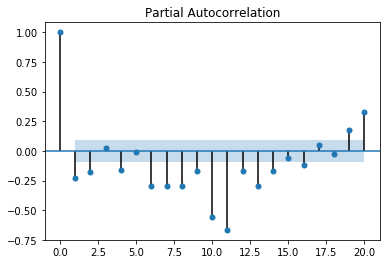

In [54]:
plot_pacf(ts_beer[nshifts:],lags=20)
plt.show()

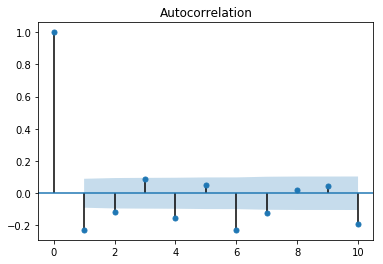

In [55]:
plot_acf(ts_beer[nshifts:],lags=10)
plt.show()

In [56]:
# p = 1, q=0

In [57]:
#Modelling

In [58]:
df_beer.tail(12)

,Monthly beer production in Australia
Month,
1994-09-30,143.0
1994-10-31,160.0
1994-11-30,190.0
1994-12-31,182.0
1995-01-31,138.0
1995-02-28,136.0
1995-03-31,152.0
1995-04-30,127.0
1995-05-31,151.0


In [59]:
df_train = df_beer[df_beer.index < pd.to_datetime('1994-09-30')]
df_test = df_beer[df_beer.index >= pd.to_datetime('1994-09-30')]

In [60]:
from statsmodels.tsa.arima_model import ARIMA
model_beer = ARIMA(endog = df_beer['Monthly beer production in Australia'], order = [1,1,0], freq='M')
result = model_beer.fit()
result.summary()

C:\Users\SujitSonar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       ARIMA Model Results                                        
==================================================================================================
Dep. Variable:     D.Monthly beer production in Australia   No. Observations:                  475
Model:                                     ARIMA(1, 1, 0)   Log Likelihood               -2075.474
Method:                                           css-mle   S.D. of innovations             19.114
Date:                                    Mon, 11 Oct 2021   AIC                           4156.947
Time:                                            09:39:01   BIC                           4169.437
Sample:                                        02-29-1956   HQIC                          4161.859
                                             - 08-31-1995                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.1116      0.714      0.156      0.876      -1.288       1.511
ar.L1.D.Monthly beer production in Australia    -0.2286      0.045     -5.108      0.000      -0.316      -0.141
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -4.3741           +0.0000j            4.3741            0.5000
-----------------------------------------------------------------------------
"""

In [71]:
print(len(result.fittedvalues))
print(len(ts_beer))

475
476


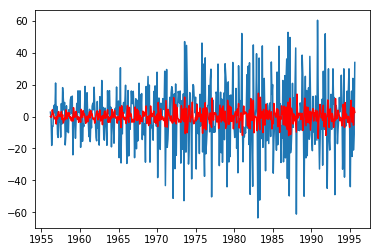

In [73]:
plt.plot(ts_beer)
plt.plot(result.fittedvalues, color='red')

In [80]:
pred_val = result.forecast(12)[0]
pred_val

array([145.3640981 , 147.24687749, 146.95352308, 147.15767017,
       147.24807989, 147.36449193, 147.47495939, 147.58678588,
       147.69830167, 147.8098885 , 147.92145908, 148.03303338])

In [62]:
df_test

,Monthly beer production in Australia
Month,
1994-09-30,143.0
1994-10-31,160.0
1994-11-30,190.0
1994-12-31,182.0
1995-01-31,138.0
1995-02-28,136.0
1995-03-31,152.0
1995-04-30,127.0
1995-05-31,151.0


In [63]:
from sklearn.metrics import mean_absolute_percentage_error

In [64]:
1-mean_absolute_percentage_error(pred_val,df_test['Monthly beer production in Australia'].values )

0.8904513542467074